# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

import numpy as np
import pandas as pd

colors = ['#f94144', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#577590']

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
path = '../data/Wholesale customers data.csv'

data = pd.read_csv(path)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
display(data.info())

# no categorical data to convert
# no nulls in all dataset
#
# cols meaning
# channel == medium of sale
# region == where the sale has been done
# fresh, milk, grocery, frozen, detergents_paper and delicassen == types of products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


None

In [5]:
display(data['Channel'].unique())
display(data['Region'].unique())

array([2, 1])

array([3, 1, 2])

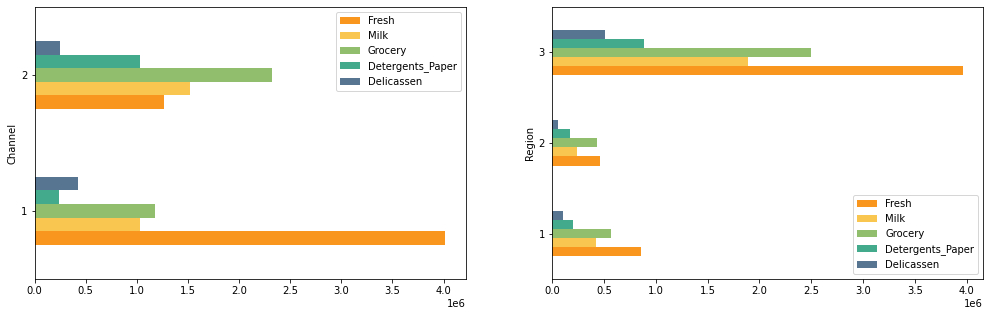

In [6]:
table_1 = data[['Fresh', 'Milk', 'Grocery', 'Detergents_Paper', 'Delicassen', 'Channel']].groupby(['Channel']).sum()
table_2 = data[['Fresh', 'Milk', 'Grocery', 'Detergents_Paper', 'Delicassen', 'Region']].groupby(['Region']).sum()

fig ,ax = plt.subplots(ncols = 2, nrows = 1, figsize=(17,5))

table_1.plot.barh(color = colors[2:], ax = ax[0])
table_2.plot.barh(color = colors[2:], ax = ax[1])

plt.show()

# There is a clear difference in Channels' distribution
# Distribution through regions doesnt really change, but sales differ through regions


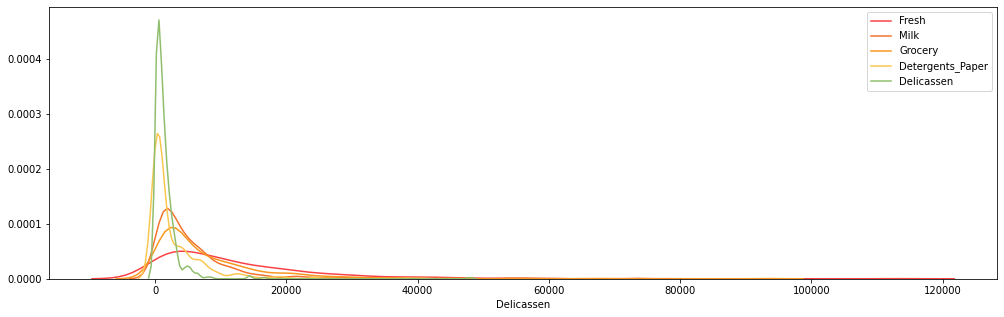

In [7]:
cols_to_plot = ['Fresh', 'Milk', 'Grocery', 'Detergents_Paper', 'Delicassen']

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (17,5))

for i in range(len(cols_to_plot)):
    sns.distplot(data[cols_to_plot[i]], hist = False, kde = True, rug = False, color = colors[i], label = cols_to_plot[i])

plt.legend()
plt.show()

# Asimetría estadística (Skewness)
# Todas las cat. de productos tienen una asimetría positiva: hay más valores distintos a la derecha de la media.
# La asimetría aumenta con colores más fríos, acercárdose a cero en Delicassen

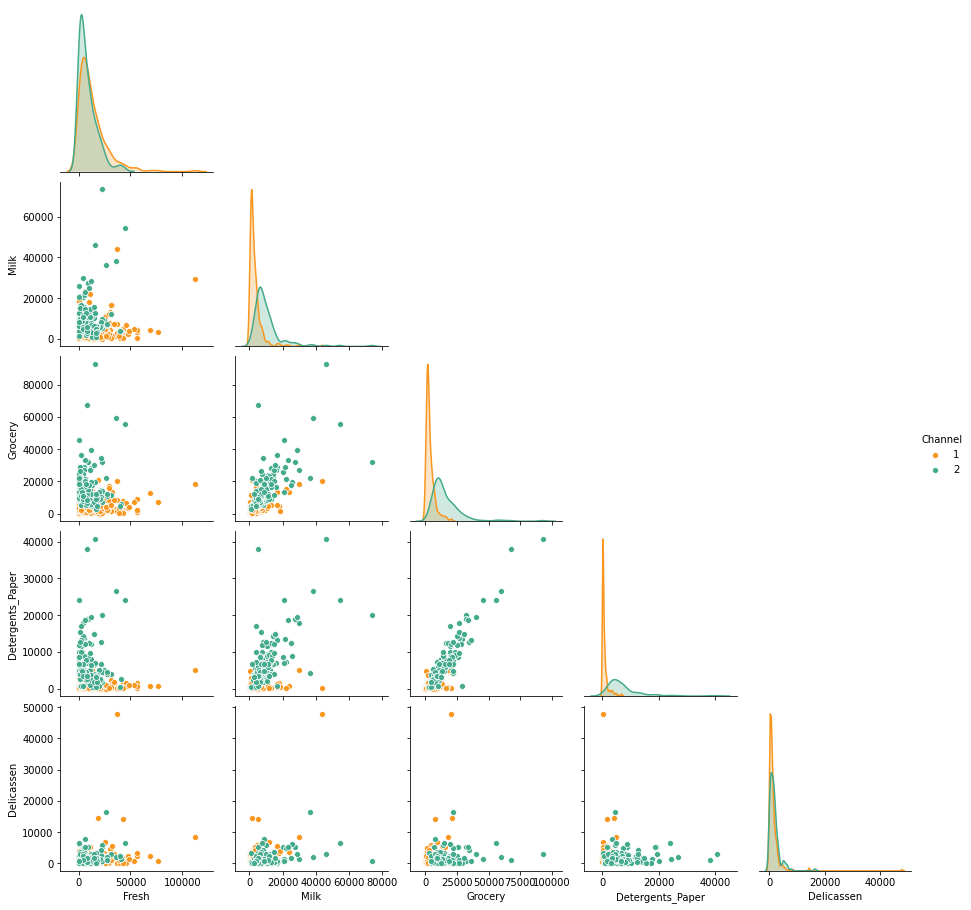

In [9]:
sns.pairplot(data[['Fresh', 'Milk', 'Grocery', 'Detergents_Paper', 'Delicassen', 'Channel']], 
             palette = colors[2::3], hue = 'Channel', corner = True)
plt.show()
# Possible outliers in Channel 2 : Grocery & Milk
# Possible outlier in Channel 1: Delicassen
# Mostly Linear Rel between cols

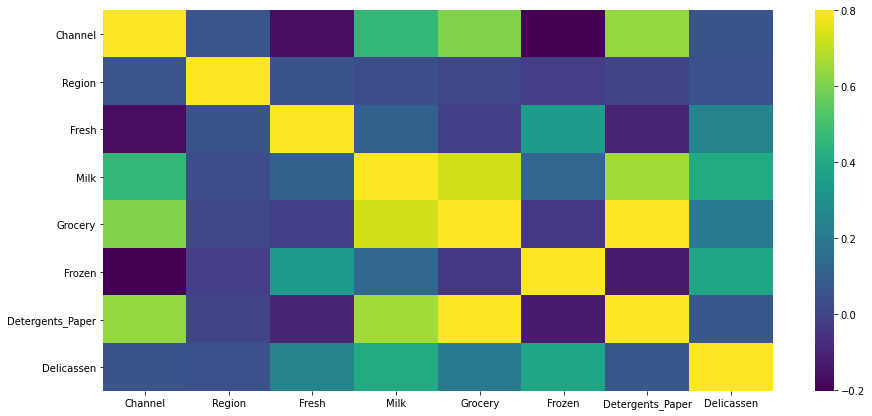

In [10]:
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize = (15, 7))
ax = sns.heatmap(corr_matrix, cmap = 'viridis', vmax = 0.8)
plt.show()

# Milk and Grocery are highly correlated
# Channel is inversely correlated with frozen and fresh ->  online purchases highly affect sensible products
# Fresh is inverselly correlated with detergents_paper
# Frozen and detergents_paper are inversely correlated
# Region doesn't have any corr rel with any other col --> where the purchase is made is not relevant for insights

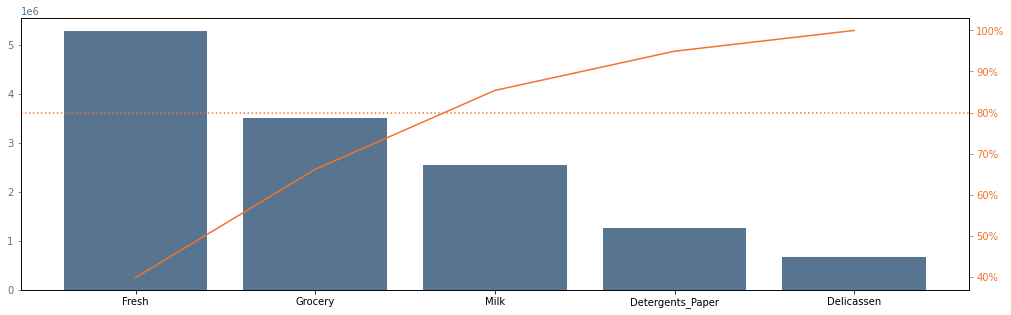

In [11]:
# pareto chart
pareto_chart = pd.pivot_table(data,
                              values = cols_to_plot,
                              index = 'Channel',
                              aggfunc = np.sum).T

pareto_chart['Totals'] = pareto_chart.sum(axis = 1, skipna = True)
pareto_chart = pareto_chart.sort_values(by = 'Totals', ascending = False)
pareto_chart['cum_perc'] = pareto_chart['Totals'].cumsum() / pareto_chart['Totals'].sum()*100

# plotting chart
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (17,5))
# totals
ax.bar(pareto_chart.index, 
       pareto_chart['Totals'], 
       color = colors[-1])
ax.tick_params(axis = 'y',
               colors = colors[-1])
# cum sum as percentage
ax2 = ax.twinx()
ax2.plot(pareto_chart.index, 
         pareto_chart['cum_perc'], 
         color = colors[1], ms=7)
ax2.axhline(80, ls=':', color = colors[1])
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis = 'y', colors = colors[1])

plt.show()

# PARETO CHART CONCLUSSIONS
# Its purpose is to highlight the most important a set of factors. In this case --> Fresh & Grocery
# "Roughly the 80% of the effects come from the 20% of the causes"
# This dataset DOESNT display this characteristic, where the 80% Totals are reached at nearly 40-50% of the items
# For this dataset to have a pareto distribution, Fresh should represent 80% of the data from items categories, 
# but it only represents about 40%
# And Fresh + Grocery (2/5 cat 40%) represent 66.5

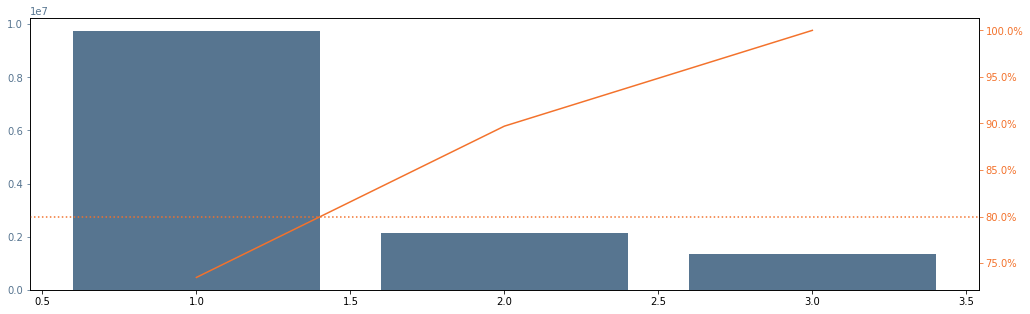

In [12]:
# pareto chart
pareto_chart = pd.pivot_table(data,
                              values = cols_to_plot,
                              index = 'Region',
                              aggfunc = np.sum)

pareto_chart['Totals'] = pareto_chart.sum(axis = 1, skipna = True)
pareto_chart = pareto_chart.sort_values(by = 'Totals', ascending = False)
pareto_chart['cum_perc'] = pareto_chart['Totals'].cumsum() / pareto_chart['Totals'].sum()*100

# plotting chart
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (17,5))
# totals
ax.bar([1, 2, 3], #tweak to represent values in ascending order despite regions being [3,1,2]
       pareto_chart['Totals'], 
       color = colors[-1])
ax.tick_params(axis = 'y',
               colors = colors[-1])
# cum sum as percentage
ax2 = ax.twinx()
ax2.plot([1, 2, 3], #tweak to represent values in ascending order despite regions being [3,1,2]
         pareto_chart['cum_perc'], 
         color = colors[1], ms=7)
ax2.axhline(80, ls=':', color = colors[1])
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis = 'y', colors = colors[1])

plt.show()

# !!!NOTE: 1 == 3 Region, 2 == 1 Region and 3 == 2 Region

# Pareto Rules doesnt really apply neither in this case, though second region represents 70% of the data
# and first and second regions represent 90% of the data

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [13]:
# Outliers: 
# Delicassen > 40.000 && Fresh > 100.000 in channel 1 
# Milk > 60.000 && Grocery > 60.000 in channel 2      

Q05 = data.quantile(0.05)
Q95 = data.quantile(0.95)

IQR = Q95 - Q05

# showing outliers
display(data.shape)
data[((data < (Q05 - 1.25 * IQR)) | (data > (Q95 + 1.25 * IQR))).any(axis = 1)].shape # (8,8)

data = data[~((data < (Q05 - 1.25 * IQR)) | (data > (Q95 + 1.25 * IQR))).any(axis = 1)]
display(data.shape)

(440, 8)

(428, 8)

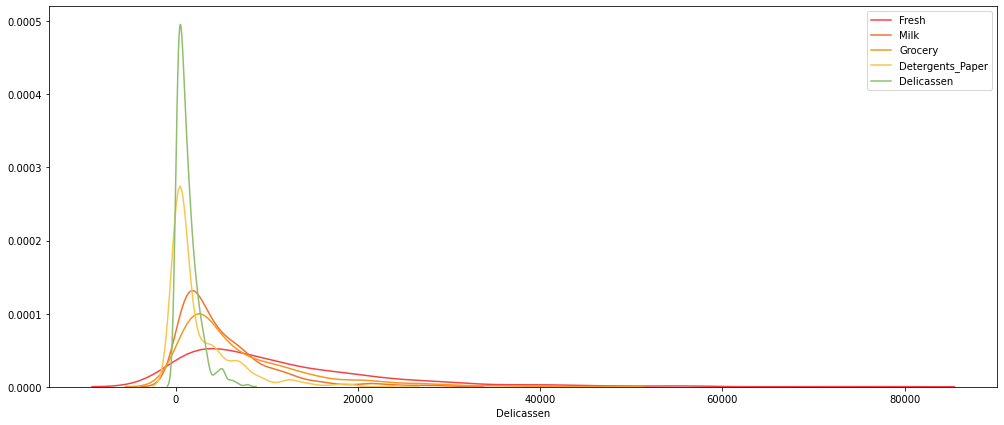

In [14]:
# Has the distr changed?

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (17,7))

for i in range(len(cols_to_plot)):
    sns.distplot(data[cols_to_plot[i]], hist = False, kde = True, rug = False, color = colors[i], label = cols_to_plot[i])

plt.legend()
plt.show()

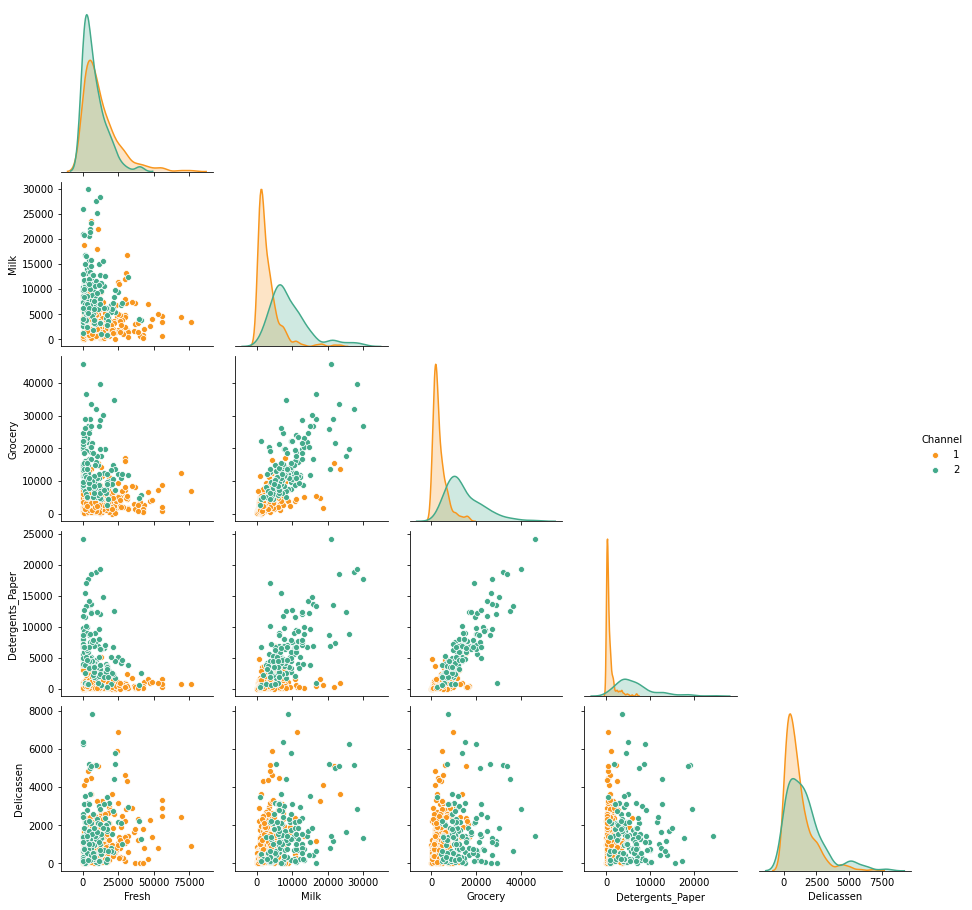

In [15]:
sns.pairplot(data[['Fresh', 'Milk', 'Grocery', 'Detergents_Paper', 'Delicassen', 'Channel']], 
             palette = colors[2::3], hue = 'Channel', corner = True)
plt.show()

In [16]:
# Removing top 5% and 95% doenst change overall distribution 
# (max 12000 to 8000 but skewness and dist remains the same)
# pairplot is easier to read, and difference between channels are more evident

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [17]:
# Standarizing & Scaling data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

customers_scale = scaler.fit_transform(data.values)

# NOTES
# Normalization  --> rescaling to domain 0..1
# Useful for models that rely on magnitude of values (distance KNN or coef. in regression)
# Scikit learn --> MinMaxScaler, Normalize
#
# Standarization --> rescaling to mean == 0 and stdev == 1
# Useful for models that rely on distribution of attributes (Gaussian processes)
# Scikit learn --> StandardScaler, Scale

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [18]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters = 4, random_state = 42, max_iter = 300, n_init = 10).fit(customers_scale)
labels = km_model.labels_

data['labels'] = labels
# parece que hay unas 3 - 4 categorías diferentes por productos

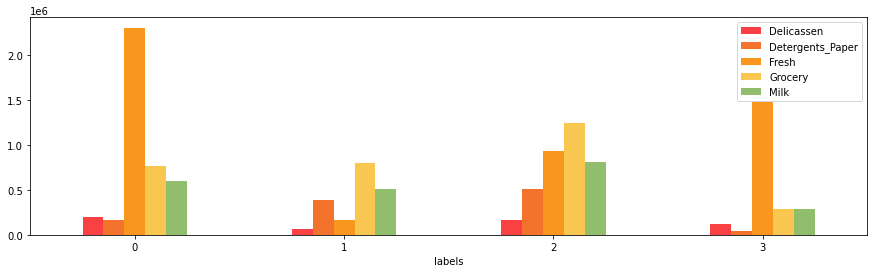

In [19]:
# plotting labels
table = pd.pivot_table(data, values = cols_to_plot, index = 'labels', aggfunc = np.sum)
table.plot.bar(figsize = (15,4), color = colors, rot = 0)
plt.show()

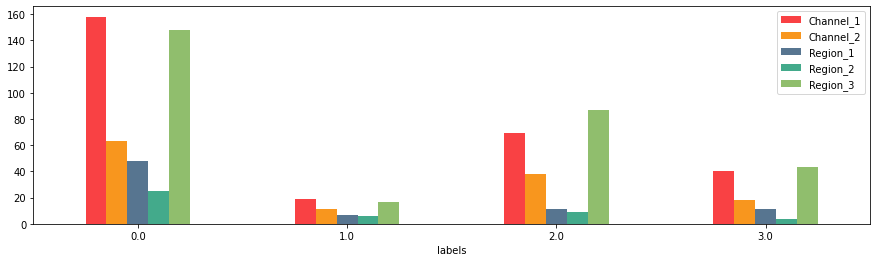

In [20]:
# understanding Regions and Channel distribution in labels
from sklearn.preprocessing import OneHotEncoder
cols = ['Region_1', 'Region_2', 'Region_3', 'Channel_1', 'Channel_2']

data_dummies = OneHotEncoder().fit_transform(data[['Region', 'Channel']]).toarray()
aux_table = pd.concat([data, pd.DataFrame(data_dummies, columns = cols)], axis = 1)

# plotting labels
cols_colors = colors[:3:2] + colors[::-1]

table = pd.pivot_table(aux_table, values = cols, index = 'labels', aggfunc = np.sum)
table.plot.bar(figsize = (15,4), color = cols_colors, rot = 0)
plt.show()

Count the values in `labels`.

In [21]:
# Your code here:
data['labels'].value_counts()

0    229
2    107
3     61
1     31
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [36]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.5, min_samples=5).fit(customers_scale)
labels = dbscan_model.labels_

data['labels_dbscan'] = labels
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_dbscan
0,2,3,12669,9656,7561,214,2674,1338,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,2,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,-1
3,1,3,13265,1196,4221,6404,507,1788,3,-1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,3,-1
436,1,3,39228,1431,764,4510,93,2346,3,-1
437,2,3,14531,15488,30243,437,14841,1867,1,-1
438,1,3,10290,1981,2232,1038,168,2125,0,-1


Count the values in `labels_DBSCAN`.

In [37]:
# Your code here
data['labels_dbscan'].value_counts()

-1    338
 0     77
 1      8
 2      5
Name: labels_dbscan, dtype: int64

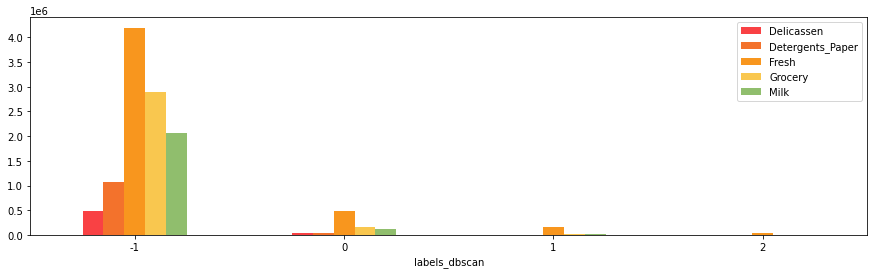

In [38]:
# plotting labels
table = pd.pivot_table(data, values = cols_to_plot, index = 'labels_dbscan', aggfunc = np.sum)
table.plot.bar(figsize = (15,4), color = colors, rot = 0)
plt.show()

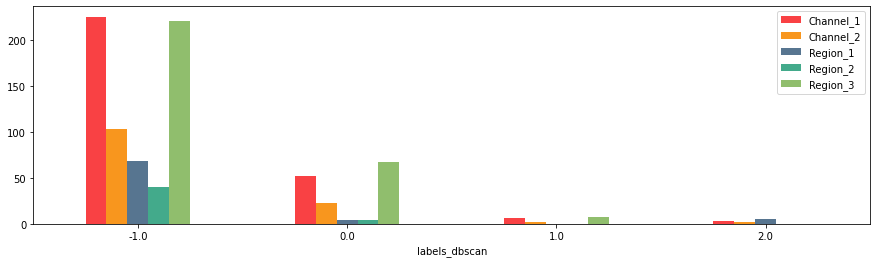

In [40]:
data_dummies = OneHotEncoder().fit_transform(data[['Region', 'Channel']]).toarray()
aux_table = pd.concat([data, pd.DataFrame(data_dummies, columns = cols)], axis = 1)

# plotting labels
cols_colors = colors[:3:2] + colors[::-1]

table = pd.pivot_table(aux_table, values = cols, index = 'labels_dbscan', aggfunc = np.sum)
table.plot.bar(figsize = (15,4), color = cols_colors, rot = 0)
plt.show()

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here